In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the preprocessed dataset
data = pd.read_csv("/preprocessed_full_dataset.csv")

#Display first 5 rows
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Churn,InternetService_Fiber optic,Contract_One year,Contract_Two year
0,0,0,0,-1.277445,0,0,-1.321350,1,False,False,False
1,1,0,0,0.351370,1,0,-1.321350,0,False,True,False
2,0,0,1,0.799294,1,0,-1.520755,0,False,False,False
3,0,0,0,-1.277445,1,0,0.373593,1,False,True,False
4,1,0,0,1.410099,1,0,-0.457261,0,True,False,False


In [2]:
# Separate features from target variable (remove Churn)
X = data.drop("Churn", axis=1)

#Check shape
X.shape

(7043, 10)

In [3]:
from sklearn.cluster import KMeans

#Create KMeans model with k=4 (from Elbow Method)
kmeans = KMeans(n_clusters=4, random_state=42)

#Fit the model to the feature dataset
kmeans.fit(X)

#Assign cluster labels to each customer
data["Cluster"] = kmeans.labels_

#Check first few rows
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Churn,InternetService_Fiber optic,Contract_One year,Contract_Two year,Cluster
0,0,0,0,-1.277445,0,0,-1.321350,1,False,False,False,2
1,1,0,0,0.351370,1,0,-1.321350,0,False,True,False,3
2,0,0,1,0.799294,1,0,-1.520755,0,False,False,False,3
3,0,0,0,-1.277445,1,0,0.373593,1,False,True,False,1
4,1,0,0,1.410099,1,0,-0.457261,0,True,False,False,3


In [4]:
# Count number of customers in each cluster
data["Cluster"].value_counts()

,count
Cluster,
1,2226
0,1919
2,1727
3,1171


In [5]:
from sklearn import cluster
# Calculate average feature values per cluster
cluster_profile = data.groupby("Cluster").mean()

cluster_profile

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Churn,InternetService_Fiber optic,Contract_One year,Contract_Two year
Cluster,,,,,,,,,,,
0,0.503387,0.214174,0.335070,1.078353,0.995310,0.436165,0.946869,0.154768,0.454403,0.206357,0.240229
1,0.490566,0.238544,0.178796,-0.707451,0.997754,0.420036,0.546871,0.491015,0.424079,0.194519,0.248877
2,0.525188,0.065431,0.311523,-0.892193,0.793283,0.420382,-1.075086,0.244933,0.442965,0.224667,0.231036
3,0.503843,0.074295,0.453459,0.893462,0.734415,0.403928,-1.005724,0.047822,0.439795,0.218617,0.239966


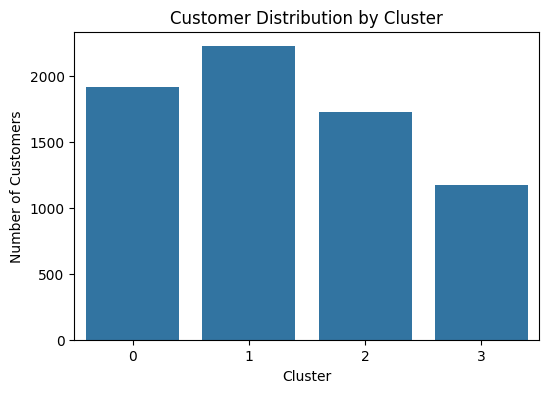

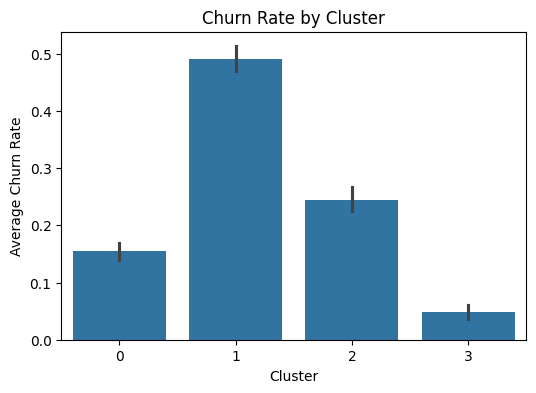

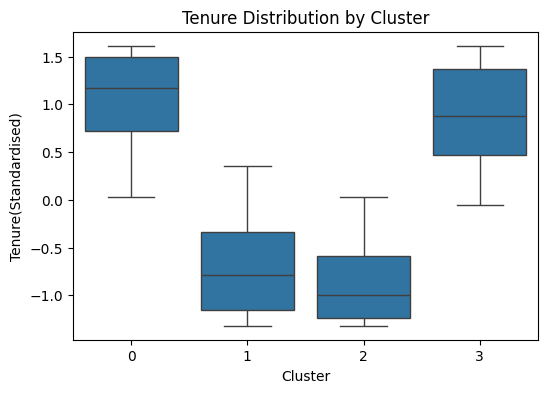

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot number of customers in each cluster
#This helps us understand whether clusters are balanced
#Balanced clusters indicate meaningful segmentation
plt.figure(figsize=(6,4))
sns.countplot(x="Cluster", data=data)

plt.title("Customer Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")

plt.show()

#!!!
#Plot average churn rate per cluster
#Since Churn is encoded as 0 and 1,
#the mean value represents the churn proportion in each cluster
plt.figure(figsize=(6,4))
sns.barplot(x="Cluster", y="Churn", data=data)

plt.title("Churn Rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Churn Rate")

plt.show()

#Visualise tenure distribution per cluster
#This helps identify whether a cluster contains
#long-term customers or newly acquired customers
plt.figure(figsize=(6,4))
sns.boxplot(x="Cluster", y="tenure", data=data)

plt.title("Tenure Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Tenure(Standardised)")

plt.show()

In [8]:
## Final Summary

#The K-Means clustering model successfully segmented customers into four distinct groups.

#Cluster analysis revealed significant differences in churn behaviour, particularly identifying a high-risk segment (Cluster 1) and a loyal long-term segment (Cluster 3).

#These insights provide a strong foundation for customer retention strategies and future predictive modelling.
